In [30]:
# Plant Leaf Classification using Multilayer Perceptron Neural Network

In [31]:
from platform import python_version
print(python_version())

3.11.8


In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [33]:
leaf_data = pd.read_csv('C:\Ekundayo\project@futa\leaf_data.csv')

In [34]:
leaf_data.head(-5)

,class,s[ecies,Eccentricity,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average intensity,Average contrast,smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,16,2,0.61717,1.2296,0.34897,0.93189,0.97368,0.60176,0.025375,0.117190,0.012906,0.070197,0.004903,0.001932,0.000024,0.37728
355,16,3,0.62404,1.1599,0.47899,0.91562,0.85088,0.45154,0.097205,1.719700,0.013983,0.076408,0.005804,0.002411,0.000026,0.36029
356,16,4,0.48229,1.1574,0.42617,0.91741,0.92456,0.46699,0.063396,0.731470,0.026522,0.105000,0.010904,0.004468,0.000068,0.63468
357,16,5,0.56840,1.1876,0.48001,0.91247,0.79474,0.38850,0.089162,1.446900,0.027113,0.101820,0.010261,0.003789,0.000107,0.65567


In [35]:
leaf_data.shape

(364, 16)

In [36]:
New_leaf_data=leaf_data[["Aspect ratio", "Elongation", "Solidity", "Stochastic convexity",
             "Isoperimetric factor", "Max Ident Depth", "Lobedness","Average contrast", "Eccentricity","smoothness", "class"]]

In [37]:
New_leaf_data.head()

,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average contrast,Eccentricity,smoothness,class
0,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.127950,0.72694,0.016108,1
1,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.090476,0.74173,0.008119,1
2,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.057445,0.76722,0.003289,1
3,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.065491,0.73797,0.004271,1
4,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.045339,0.82301,0.002051,1


In [38]:
New_leaf_data.columns

Index(['Aspect ratio', 'Elongation', 'Solidity', 'Stochastic convexity',
       'Isoperimetric factor', 'Max Ident Depth', 'Lobedness',
       'Average contrast', 'Eccentricity', 'smoothness', 'class'],
      dtype='object')

In [39]:
New_leaf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aspect ratio          364 non-null    float64
 1   Elongation            364 non-null    float64
 2   Solidity              364 non-null    float64
 3   Stochastic convexity  364 non-null    float64
 4   Isoperimetric factor  364 non-null    float64
 5   Max Ident Depth       364 non-null    float64
 6   Lobedness             364 non-null    float64
 7   Average contrast      364 non-null    float64
 8   Eccentricity          364 non-null    float64
 9   smoothness            364 non-null    float64
 10  class                 364 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 31.4 KB


In [40]:
#Selecting the necessary features as input and output
X = New_leaf_data.drop('class', axis=1)
Y = New_leaf_data[["class"]]

In [41]:
X.head()

,Aspect ratio,Elongation,Solidity,Stochastic convexity,Isoperimetric factor,Max Ident Depth,Lobedness,Average contrast,Eccentricity,smoothness
0,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.127950,0.72694,0.016108
1,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.090476,0.74173,0.008119
2,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.057445,0.76722,0.003289
3,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.065491,0.73797,0.004271
4,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.045339,0.82301,0.002051


In [42]:
Y

,class
0,1
1,1
2,1
3,1
4,1
...,...
359,16
360,16
361,16
362,16


In [43]:
print(Y.shape)

(364, 1)


In [44]:
Y_reshape = np.ravel(Y)

In [45]:
Y = Y_reshape

In [46]:
print(Y.shape)

(364,)


In [47]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size=0.3, random_state =0)

In [48]:
# Guassian Naive Bayes

Gmodel=GaussianNB()
Gmodel.fit(Xtrain, Ytrain)
pred=Gmodel.predict(Xtest)

In [49]:
accuracy = accuracy_score(pred, Ytest)
print(accuracy*100)

90.0


In [50]:
Gmodel.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 7 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 8 0 1 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 9 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]


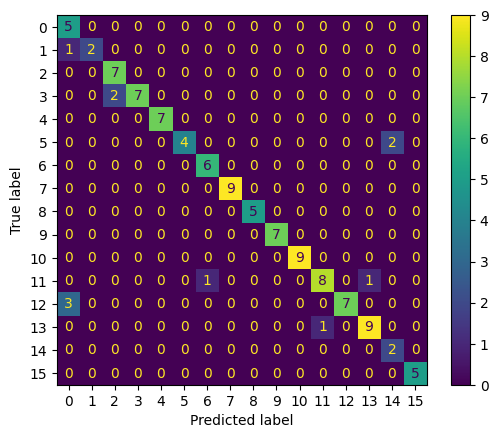

In [51]:
cm = confusion_matrix(pred, Ytest)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [29]:
class_report = classification_report(pred, Ytest)
print(class_report)

              precision    recall  f1-score   support

           1       0.56      1.00      0.71         5
           2       1.00      0.67      0.80         3
           3       0.78      1.00      0.88         7
           4       1.00      0.78      0.88         9
           5       1.00      1.00      1.00         7
           6       1.00      0.67      0.80         6
           7       0.86      1.00      0.92         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         9
          12       0.89      0.80      0.84        10
          13       1.00      0.70      0.82        10
          14       0.90      0.90      0.90        10
          15       0.50      1.00      0.67         2
          16       1.00      1.00      1.00         5

    accuracy                           0.90       110
   macro avg       0.90   